In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
skip = 1
numsteps = int(163 // skip)
ds_inputs_DE1 = pd.read_csv('C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd\\results_for_comparing\\saved_ML_datasets\\DE_ML_ERA5_2001_2024_full.csv')
ds_inputs_DE1[[f't2max at day {skip*n}' for n in range(numsteps)]] += -273.15
ds_inputs_DE1[[f't2min at day {skip*n}' for n in range(numsteps)]] += -273.15
ds_inputs_DE2 = pd.read_csv('C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd\\results_for_comparing\\saved_ML_datasets\\DE_ML_ERA5_90s.csv')

ds_inputs_DE = pd.concat([ds_inputs_DE1, ds_inputs_DE2], axis = 0)
#ds_inputs_DE.loc[:, [f'temperature at day {n}' for n in range(200)]] = modelling_fctns.Wang_Engel_Temp_response(ds_inputs_DE.loc[:, [f'temperature at day {n}' for n in range(200)]], 7, 28, 42)
ds_inputs_DE=ds_inputs_DE.rename(columns={'Referenzjahr':'year'})
print(len(ds_inputs_DE))
ds_inputs_DE = ds_inputs_DE.dropna(how='all')
print(len(ds_inputs_DE))
ds_inputs_DE = ds_inputs_DE.loc[ds_inputs_DE['observed time to beginning of flowering'] < 140]
ds_inputs_DE = ds_inputs_DE.loc[ds_inputs_DE['observed time to beginning of flowering'] > 40]
new_series = []
ds_inputs_DE.loc[:, [f't2max at day {skip*n}' for n in range(numsteps)]] = ds_inputs_DE.loc[:, [f't2max at day {skip*n}' for n in range(numsteps)]].values - ds_inputs_DE.loc[:, [f't2m at day {skip*n}' for n in range(numsteps)]].values
ds_inputs_DE.loc[:, [f't2min at day {skip*n}' for n in range(numsteps)]] = ds_inputs_DE.loc[:, [f't2m at day {skip*n}' for n in range(numsteps)]].values - ds_inputs_DE.loc[:, [f't2min at day {skip*n}' for n in range(numsteps)]].values

27153
27153


In [3]:
ds_inputs_SSA = pd.read_csv('C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd\\results_for_comparing\\saved_ML_datasets\\SSA_ML_ERA5_1999_2008_with_varieties2.csv')
ds_inputs_SSA = ds_inputs_SSA.loc[ds_inputs_SSA['observed time to beginning of flowering'] < 105]

In [4]:
def split_ds_by_AEZ(ds):
    ds_semiarid = ds.loc[ds['AEZ'].isin([1, 4, 10])]
    ds_humid = ds.loc[ds['AEZ'].isin([3])]
    ds_subhumid = ds.loc[ds['AEZ'].isin([2, 5, 11, 14])]
    ds_arid = ds.loc[ds['AEZ'].isin([26, 29])]
    ds_city = ds.loc[ds['AEZ'].isin([32])]
    print(f'\nnum arid: {len(ds_arid)}',
        f'\nnum city: {len(ds_city)}',
        f'\nnum semiarid: {len(ds_semiarid)}',
        f'\nnum subhumid: {len(ds_subhumid)}',
        f'\nnum humid: {len(ds_humid)}')
    ds_dict = {'arid': ds_arid,
               'city': ds_city,
               'semiarid': ds_semiarid,
               'subhumid': ds_subhumid,
               'humid': ds_humid}
    return ds_dict
    

In [5]:
def split_ds_by_AEZ2(ds):
    ds_arid_low = ds.loc[ds['AEZ'].isin([1, 26, 29])].groupby(['Stations_id', 'Referenzjahr']).head(2)
    ds_humid_low = ds.loc[ds['AEZ'].isin([2, 3])].groupby(['Stations_id', 'Referenzjahr']).head(2)
    ds_arid_high = ds.loc[ds['AEZ'].isin([4, 10])].groupby(['Stations_id', 'Referenzjahr']).head(2)
    ds_humid_high = ds.loc[ds['AEZ'].isin([5, 11, 14])].groupby(['Stations_id', 'Referenzjahr']).head(2)
    ds_city = ds.loc[ds['AEZ'].isin([32])].groupby(['Stations_id', 'Referenzjahr']).head(2)
    print(f'\nnum arid low: {len(ds_arid_low)}',
        f'\nnum city: {len(ds_city)}',
        f'\nnum arid high: {len(ds_arid_high)}',
        f'\nnum humid low: {len(ds_humid_low)}',
        f'\nnum humid high: {len(ds_humid_high)}')
    ds_dict = {'arid low': ds_arid_low,
               'city': ds_city,
               'arid high': ds_arid_high,
               'humid low': ds_humid_low,
               'humid high': ds_humid_high}
    return ds_dict

In [6]:
def split_ds_by_AEZ3(ds):
    ds_arid_low = ds.loc[ds['AEZ'].isin([1, 26, 29])]
    ds_humid_low = ds.loc[ds['AEZ'].isin([2, 3, 32])]
    ds_high = ds.loc[ds['AEZ'].isin([4, 5, 10, 11, 14])]
    print(f'\nnum arid low: {len(ds_arid_low)}',
        f'\nnum humid low: {len(ds_humid_low)}',
        f'\nnum high: {len(ds_high)}')
    ds_dict = {'arid low': ds_arid_low,
               'humid low': ds_humid_low,
               'high or cool': ds_high}
    return ds_dict

In [7]:
def split_ds_by_AEZ4(ds):
    ds_arid_low = ds.loc[ds['AEZ'].isin([1, 26, 29])].groupby(['Stations_id', 'Referenzjahr']).head(2)
    ds_humid_low = ds.loc[ds['AEZ'].isin([2, 3])].groupby(['Stations_id', 'Referenzjahr']).head(2)
    ds_high = ds.loc[ds['AEZ'].isin([4, 5])].groupby(['Stations_id', 'Referenzjahr']).head(2)
    ds_cool = ds.loc[ds['AEZ'].isin([10, 11, 14])].groupby(['Stations_id', 'Referenzjahr']).head(2)
    ds_city = ds.loc[ds['AEZ'].isin([32])].groupby(['Stations_id', 'Referenzjahr']).head(2)
    print(f'\nnum arid low: {len(ds_arid_low)}',
        f'\nnum city: {len(ds_city)}',
        f'\nnum high: {len(ds_high)}',
        f'\nnum humid low: {len(ds_humid_low)}',
        f'\nnum cool: {len(ds_cool)}')
    ds_dict = {'arid low': ds_arid_low,
               'city': ds_city,
               'high': ds_high,
               'humid low': ds_humid_low,
               'cool': ds_cool}
    return ds_dict

In [8]:
ds_SSA_early = ds_inputs_SSA.loc[(ds_inputs_SSA['vargroup'] == 'EPOP')|(ds_inputs_SSA['vargroup'] == 'EIHY')].groupby(['Stations_id', 'Referenzjahr', 'Management']).first().reset_index().drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
ds_SSA_early = ds_inputs_SSA.loc[(ds_inputs_SSA['vargroup'] == 'EPOP')|(ds_inputs_SSA['vargroup'] == 'EIHY')].reset_index().drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
#ds_SSA_early = ds_SSA_early.loc[(ds_SSA_early['Management'] == 'Optimal')|(ds_SSA_early['Management'] == 'Low pH')|(ds_SSA_early['Management'] == 'Low N')].groupby(['Stations_id', 'Referenzjahr']).first().reset_index()
#ds_SSA_early = ds_SSA_early.groupby(['Stations_id', 'Referenzjahr']).first().reset_index()
early_ds_dict = split_ds_by_AEZ4(ds_SSA_early)


num arid low: 125 
num city: 53 
num high: 69 
num humid low: 81 
num cool: 10


In [9]:
ds_SSA_late = ds_inputs_SSA.loc[(ds_inputs_SSA['vargroup'] == 'ILPO')|(ds_inputs_SSA['vargroup'] == 'ILHY')].groupby(['Stations_id', 'Referenzjahr', 'Management']).first().reset_index().drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
ds_SSA_late = ds_inputs_SSA.loc[(ds_inputs_SSA['vargroup'] == 'ILPO')|(ds_inputs_SSA['vargroup'] == 'ILHY')].reset_index().drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
#ds_SSA_late = ds_SSA_late.loc[(ds_SSA_late['Management'] == 'Optimal')|(ds_SSA_late['Management'] == 'Low pH')|(ds_SSA_late['Management'] == 'Low N')].groupby(['Stations_id', 'Referenzjahr']).first().reset_index()
late_ds_dict = split_ds_by_AEZ4(ds_SSA_late)


num arid low: 109 
num city: 44 
num high: 62 
num humid low: 79 
num cool: 3


71.29070758738276 70.60417768376517


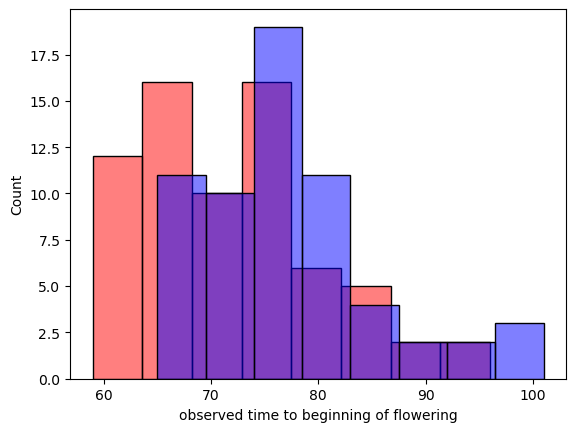

In [10]:
fig, ax = plt.subplots()
sns.histplot(early_ds_dict['high']['observed time to beginning of flowering'], color='red', ax=ax, alpha=0.5)
sns.histplot(late_ds_dict['high']['observed time to beginning of flowering'], color='blue', ax=ax, alpha=0.5)
print(early_ds_dict['high']['observed time to beginning of flowering'].var(),
      late_ds_dict['high']['observed time to beginning of flowering'].var())

66.97860962566845 72.1574074074074


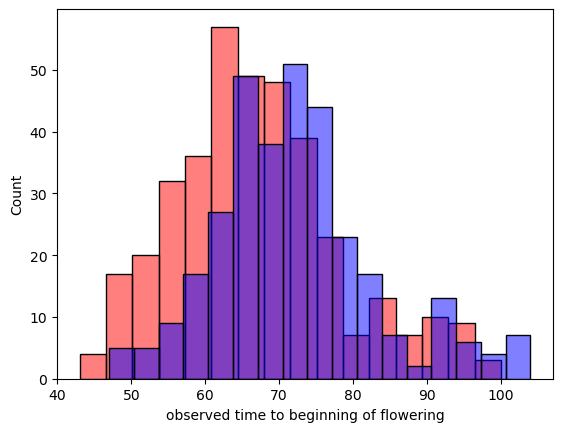

In [11]:
fig, ax = plt.subplots()
sns.histplot(ds_SSA_early['observed time to beginning of flowering'], color='red', ax=ax, alpha=0.5)
sns.histplot(ds_SSA_late['observed time to beginning of flowering'], color='blue', ax=ax, alpha=0.5)
print(ds_SSA_early['observed time to beginning of flowering'].mean(),
      ds_SSA_late['observed time to beginning of flowering'].mean())

In [12]:
df_counts = pd.DataFrame()
df_counts['Count samples early varieties'] = [len(ds) for ds in early_ds_dict.values()]
df_counts['Count samples late varieties'] = [len(ds) for ds in late_ds_dict.values()]
df_counts['AEZ'] = ['Arid\nlowlands', 'Cities', 'Highlands', 'Humid\nlowlands', 'Cool (South Africa only)']
df_counts

,Count samples early varieties,Count samples late varieties,AEZ
0,125,109,Arid\nlowlands
1,53,44,Cities
2,69,62,Highlands
3,81,79,Humid\nlowlands
4,10,3,Cool (South Africa only)
